In [1]:
#preprocessing of data

In [2]:
import pandas as pd
#reading breast cancer csv file
cancer=pd.read_csv('C:\\Users\\Dell\\Desktop\\data.csv')
cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
#checking for null values in any columns


null_columns=cancer.columns[cancer.isnull().any()]
cancer[null_columns].isnull().sum()

Unnamed: 32    569
dtype: int64

In [4]:
#as the column named unnamed: 32 contains null values we are going to drop it
#also as the column named id is irrelevant for our training model we are going to drop it as well


cancer=cancer.drop(['id','Unnamed: 32'],axis=1)
#cancer.corr()

In [5]:
#converting the diagnosis column into numerical format

cancer['diagnosis']=cancer['diagnosis'].astype("category")
cancer['diagnosis']=cancer['diagnosis'].cat.codes
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer=cancer.rename(columns={"concave points_mean": "concave_points_mean"})

In [7]:
#to check the correlation between input features and output features to select the appropriate features for training model
cancer.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [8]:
#dividing the dataset into input and output dataframes 
x=cancer[['radius_mean','texture_mean','area_mean','perimeter_mean','concavity_mean','concave_points_mean']]
y=cancer['diagnosis']

In [9]:
z=cancer[['diagnosis','radius_mean','texture_mean','area_mean','perimeter_mean','concavity_mean','concave_points_mean']]
z.corr()

,diagnosis,radius_mean,texture_mean,area_mean,perimeter_mean,concavity_mean,concave_points_mean
diagnosis,1.000000,0.730029,0.415185,0.708984,0.742636,0.696360,0.776614
radius_mean,0.730029,1.000000,0.323782,0.987357,0.997855,0.676764,0.822529
texture_mean,0.415185,0.323782,1.000000,0.321086,0.329533,0.302418,0.293464
area_mean,0.708984,0.987357,0.321086,1.000000,0.986507,0.685983,0.823269
perimeter_mean,0.742636,0.997855,0.329533,0.986507,1.000000,0.716136,0.850977
concavity_mean,0.696360,0.676764,0.302418,0.685983,0.716136,1.000000,0.921391
concave_points_mean,0.776614,0.822529,0.293464,0.823269,0.850977,0.921391,1.000000


In [10]:
x.head()

,radius_mean,texture_mean,area_mean,perimeter_mean,concavity_mean,concave_points_mean
0,17.99,10.38,1001.0,122.80,0.3001,0.14710
1,20.57,17.77,1326.0,132.90,0.0869,0.07017
2,19.69,21.25,1203.0,130.00,0.1974,0.12790
3,11.42,20.38,386.1,77.58,0.2414,0.10520
4,20.29,14.34,1297.0,135.10,0.1980,0.10430


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int8

In [12]:
#visualize data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(cancer,hue='diagnosis',vars=['radius_mean','perimeter_mean','texture_mean','area_mean','concavity_mean','concave_points_mean'])
plt.show()

<Figure size 1576.74x1500 with 42 Axes>

In [14]:
import matplotlib.pyplot as plt

In [28]:
#scatter plots

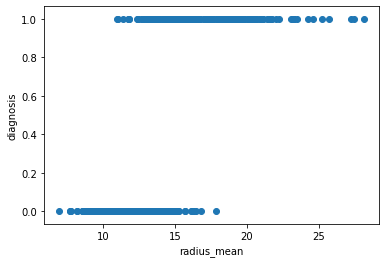

In [38]:
plt.scatter(cancer.radius_mean,cancer.diagnosis)
plt.xlabel("radius_mean")
plt.ylabel("diagnosis")
plt.show()

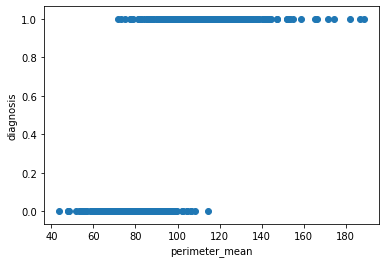

In [37]:
plt.scatter(cancer.perimeter_mean,cancer.diagnosis)
plt.xlabel("perimeter_mean")
plt.ylabel("diagnosis")
plt.show()

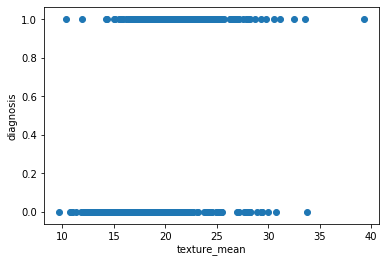

In [36]:
plt.scatter(cancer.texture_mean,cancer.diagnosis)
plt.xlabel("texture_mean")
plt.ylabel("diagnosis")
plt.show()

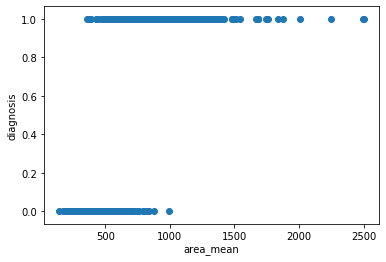

In [33]:
plt.scatter(cancer.area_mean,cancer.diagnosis)
plt.xlabel("area_mean")
plt.ylabel("diagnosis")
plt.show()

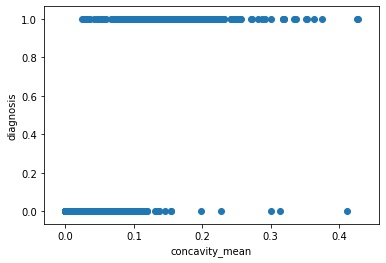

In [34]:
plt.scatter(cancer.concavity_mean,cancer.diagnosis)
plt.xlabel("concavity_mean")
plt.ylabel("diagnosis")
plt.show()

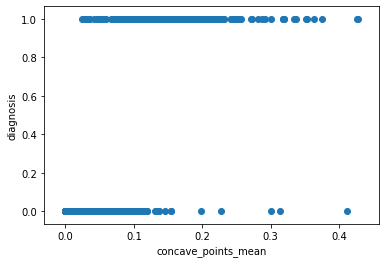

In [35]:
plt.scatter(cancer.concavity_mean,cancer.diagnosis)
plt.xlabel("concave_points_mean")
plt.ylabel("diagnosis")
plt.show()

In [15]:
#boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x1428532ef60>,
 'caps': [<matplotlib.lines.Line2D at 0x1428533c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1428532ee10>],
 'medians': [<matplotlib.lines.Line2D at 0x1428533cf60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1428533cf28>],
 'means': []}

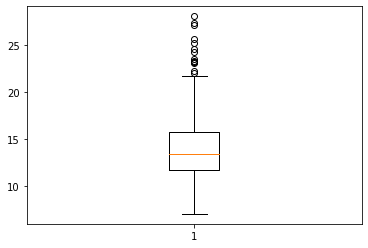

In [16]:
plt.boxplot(cancer.radius_mean)

{'whiskers': [<matplotlib.lines.Line2D at 0x142853a75c0>,
 'caps': [<matplotlib.lines.Line2D at 0x142853a7cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x142853a71d0>],
 'medians': [<matplotlib.lines.Line2D at 0x142853b2390>],
 'fliers': [<matplotlib.lines.Line2D at 0x142853b26d8>],
 'means': []}

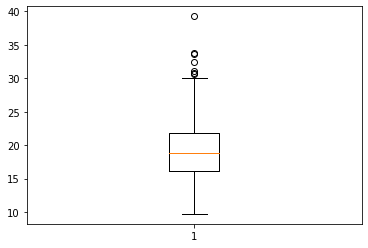

In [17]:
plt.boxplot(cancer.texture_mean)

{'whiskers': [<matplotlib.lines.Line2D at 0x142854088d0>,
 'caps': [<matplotlib.lines.Line2D at 0x14285408fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x142854084e0>],
 'medians': [<matplotlib.lines.Line2D at 0x142854156a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x142854159e8>],
 'means': []}

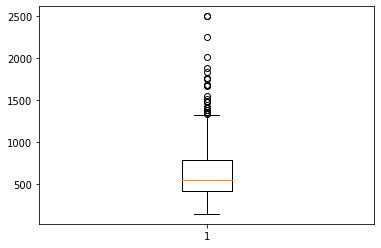

In [18]:
plt.boxplot(cancer.area_mean)

{'whiskers': [<matplotlib.lines.Line2D at 0x14285462e10>,
 'caps': [<matplotlib.lines.Line2D at 0x142854717f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14285462cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x14285471e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x14285471e48>],
 'means': []}

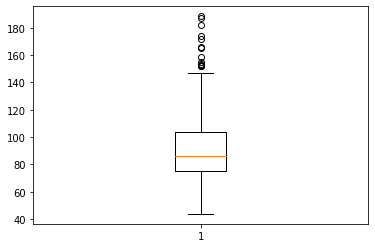

In [19]:
plt.boxplot(cancer.perimeter_mean)

{'whiskers': [<matplotlib.lines.Line2D at 0x142854d1898>,
 'caps': [<matplotlib.lines.Line2D at 0x142854d1f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x142854d14a8>],
 'medians': [<matplotlib.lines.Line2D at 0x142854dc668>],
 'fliers': [<matplotlib.lines.Line2D at 0x142854dc9b0>],
 'means': []}

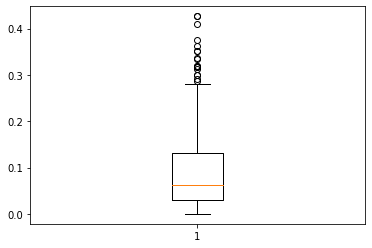

In [20]:
plt.boxplot(cancer.concavity_mean)

{'whiskers': [<matplotlib.lines.Line2D at 0x14283ab8e48>,
 'caps': [<matplotlib.lines.Line2D at 0x14283ab8080>,
 'boxes': [<matplotlib.lines.Line2D at 0x14283ab8908>],
 'medians': [<matplotlib.lines.Line2D at 0x14283ab82b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14284547668>],
 'means': []}

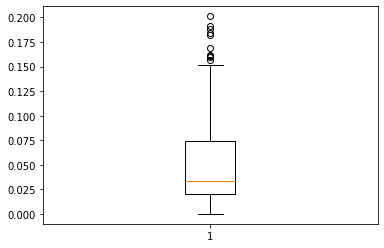

In [21]:
plt.boxplot(cancer.concave_points_mean)

In [22]:
#scaling the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

[[0.52103744 0.0226581  0.36373277 0.54598853 0.70313964 0.73111332]
 [0.64314449 0.27257355 0.50159067 0.61578329 0.20360825 0.34875746]
 [0.60149557 0.3902604  0.44941676 0.59574321 0.46251172 0.63568588]
 ...
 [0.45525108 0.62123774 0.30311771 0.44578813 0.21675258 0.26351889]
 [0.64456434 0.66351031 0.4757158  0.66553797 0.82333646 0.7554672 ]
 [0.03686876 0.50152181 0.01590668 0.02853984 0.         0.        ]]


In [23]:
#model fitting


In [24]:
#logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

In [25]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions=logmodel.predict(X_test)


In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94       108\n           1       0.98      0.81      0.89        63\n\n    accuracy                           0.92       171\n   macro avg       0.94      0.90      0.91       171\nweighted avg       0.93      0.92      0.92       171\n'

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm=np.array(confusion_matrix(y_test,predictions,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,51,12
is_healthy,1,107


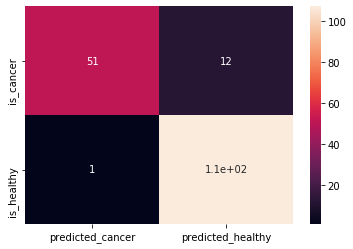

In [42]:
sns.heatmap(confusion,annot=True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,predictions))

0.9239766081871345


In [44]:
#decision tree

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


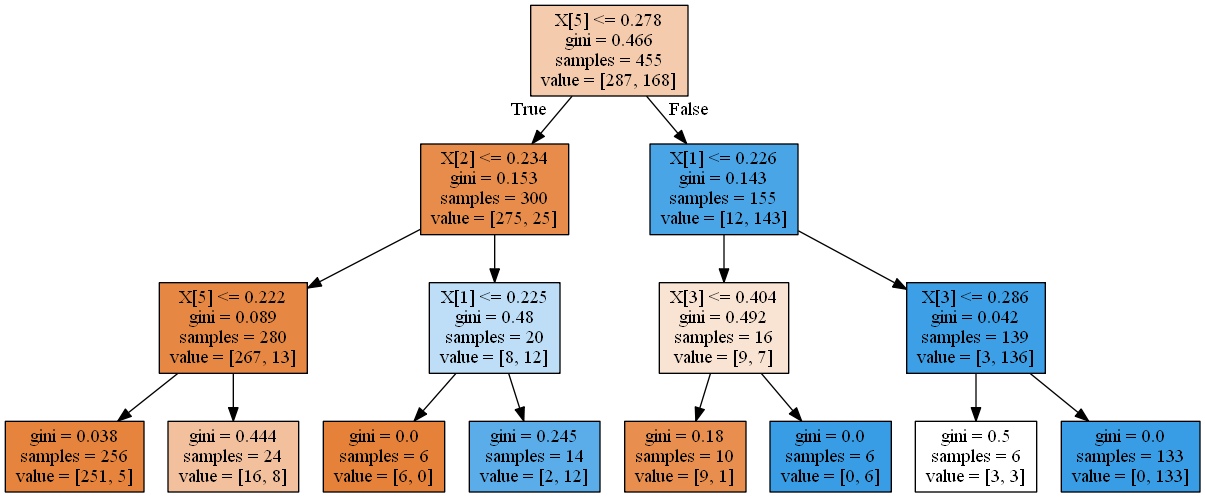

In [48]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm=np.array(confusion_matrix(y_test,y_pred,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

,predicted_cancer,predicted_healthy
is_cancer,38,6
is_healthy,4,66


In [ ]:
sns.heatmap(confusion,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_pred))   

In [ ]:
#Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=20)
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,Y_train)

In [ ]:
y_predict=svc_model.predict(X_test)
#print(y_predict)
#print(Y_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
cm=np.array(confusion_matrix(Y_test,y_predict,labels=[1,0]))
confusion=pd.DataFrame(cm,index=['is_cancer','is_healthy'],columns=['predicted_cancer','predicted_healthy'])
confusion

In [ ]:
sns.heatmap(confusion,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score : ',accuracy_score(Y_test,y_predict))
print(classification_report(Y_test,y_predict))

In [ ]:
#plotting svm 

In [ ]:
df=cancer[['radius_mean','texture_mean','area_mean','perimeter_mean','concavity_mean','concave_points_mean']]
df.head()

In [ ]:
X=df.iloc[:,0:2]
Y=cancer['diagnosis']

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=40, cmap='autumn')
#plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='autumn')

In [ ]:
from sklearn.svm import SVC 

model = SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

model.fit(X, Y)

In [ ]:
model.support_vectors_

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=30, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
import numpy as np
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, s=10, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#prediction

In [ ]:
x=cancer[['radius_mean','texture_mean','area_mean','perimeter_mean','concavity_mean','concave_points_mean']]
y=cancer['diagnosis']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
print(x)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x,y)

In [ ]:
y_predict=svc_model.predict([[0.730029,1.000000,0.323782,0.997855,0.987357,0.170581]])
print("if the output is 1 then it shows that the algorithm has predicted that the patient has cancer")
print("if the output is 0 then it shows that the algorithm has predicted that the patient does not have cancer")
print("the output is : ",y_predict)